
# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the Data

In [ ]:
df=pd.read_csv('/content/Traffic_Accidents-2.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [ ]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [ ]:
df.describe(include=[object])

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,52000,52000,51998,51999,51999,51993,51989,51999,51999,51999,51999,51959
unique,38979,366,1420,103,6,3,6,5,9,6,2,14821
top,2.01E+12,21/10/2005,17:30,E10000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01000004
freq,13022,249,501,2237,39351,51768,42824,37477,42490,36605,40976,138


In [ ]:
df.describe(include=[float,int])

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0
Date,0


In [ ]:
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean(), inplace=True)
df['Speed_limit'].fillna(df['Speed_limit'].mean(),inplace=True)
df['Time'].fillna(df['Time'].mode()[0],inplace=True)
df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].mean(),inplace=True)
df['1st_Road_Number'].fillna(df['1st_Road_Number'].mean(),inplace=True)
df['2nd_Road_Number'].fillna(df['2nd_Road_Number'].mean(),inplace=True)


In [ ]:
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)
df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0],inplace=True)
df['Year'].fillna(df['Year'].mode()[0],inplace=True)
df['Local_Authority_(Highway)'].fillna(df['Local_Authority_(Highway)'].mode()[0],inplace=True)
df['1st_Road_Class'].fillna(df['1st_Road_Class'].mode()[0],inplace=True)
df['Road_Type'].fillna(df['Road_Type'].mode()[0],inplace=True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0],inplace=True)
df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode()[0],inplace=True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0],inplace=True)
df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0],inplace=True)
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0],inplace=True)
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0],inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0],inplace=True)
df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].mode()[0],inplace=True)

In [ ]:
df.describe(include=[object])

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,52000,52000,52000,52000,52000,52000,52000,52000,52000,52000,52000,52000
unique,38979,366,1420,103,6,3,6,5,9,6,2,14821
top,2.01E+12,21/10/2005,17:30,E10000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01000004
freq,13022,249,503,2238,39352,51775,42835,37478,42491,36606,40977,179


In [ ]:
df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,10/11/2005,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,17/08/2005,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,22/08/2005,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,18/12/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,18/04/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


<ipython-input-179-cfd912b068f4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-179-cfd912b068f4>:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-179-cfd912b068f4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-179-cfd912b068f4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])

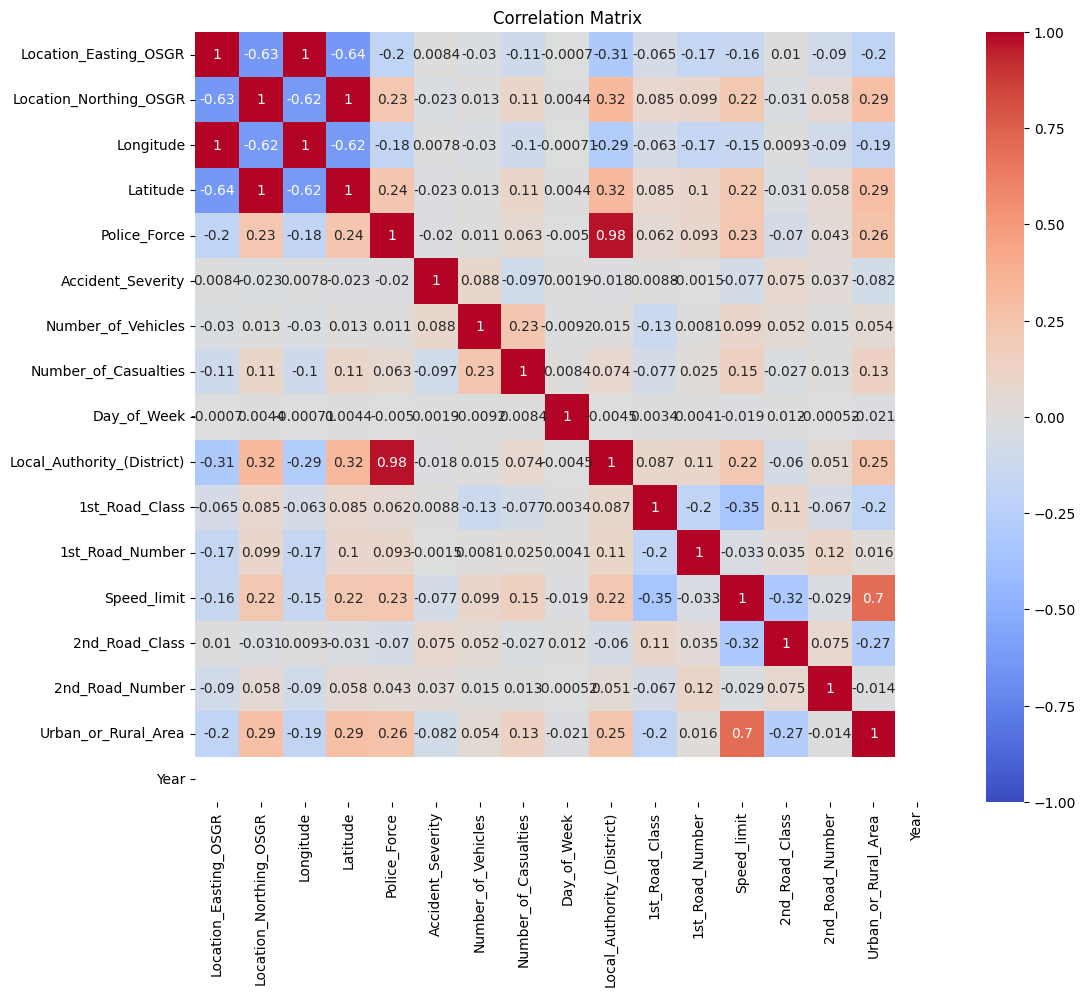

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Use numerical_df here
plt.title('Correlation Matrix')
plt.show()

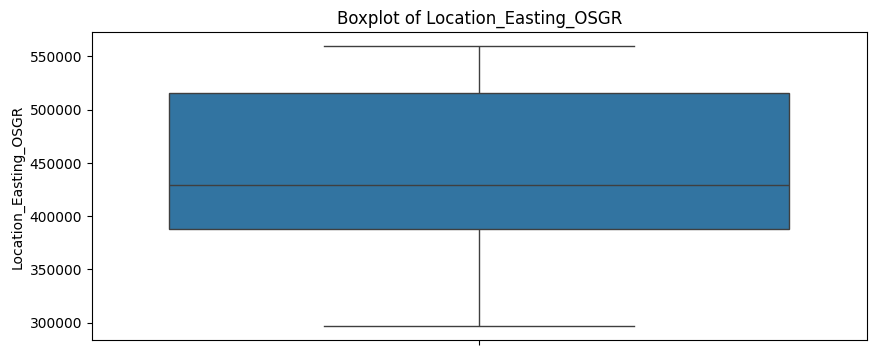

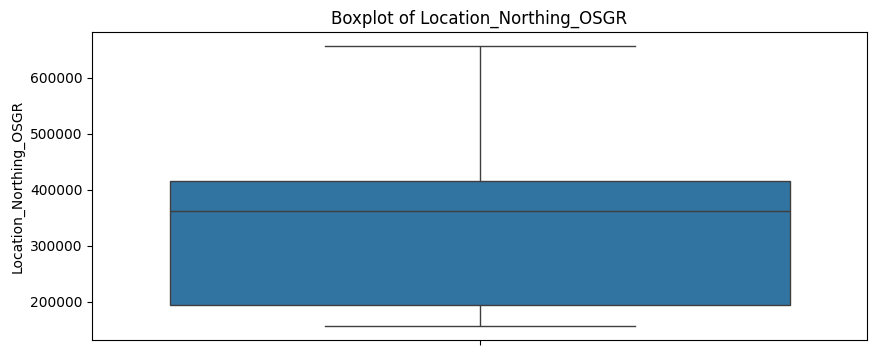

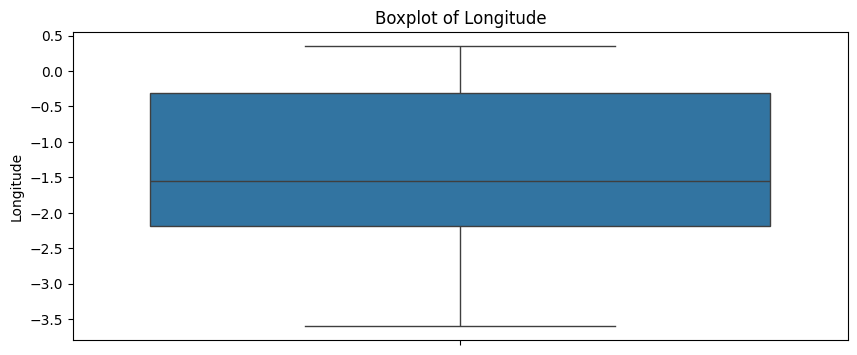

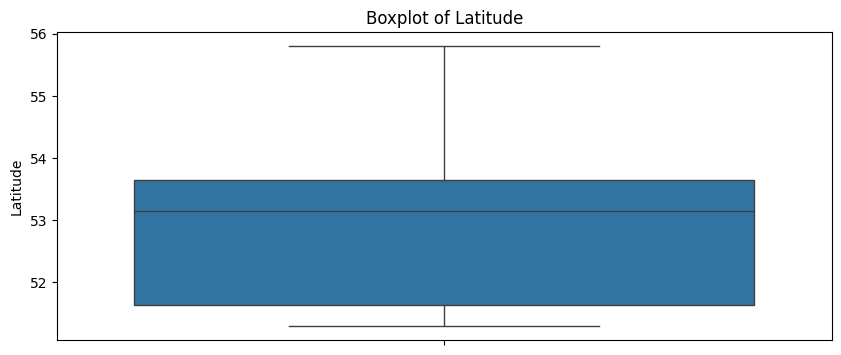

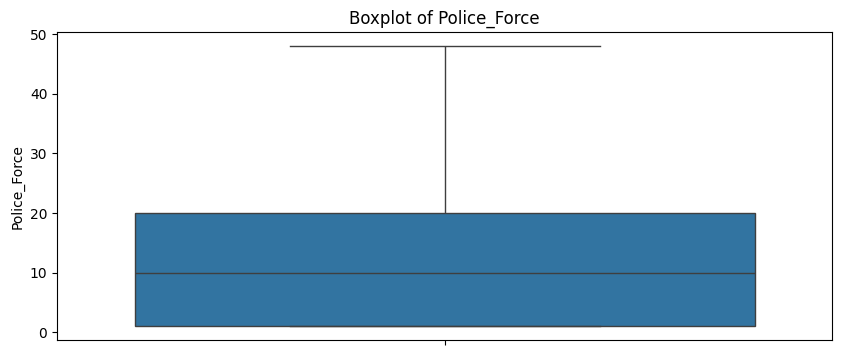

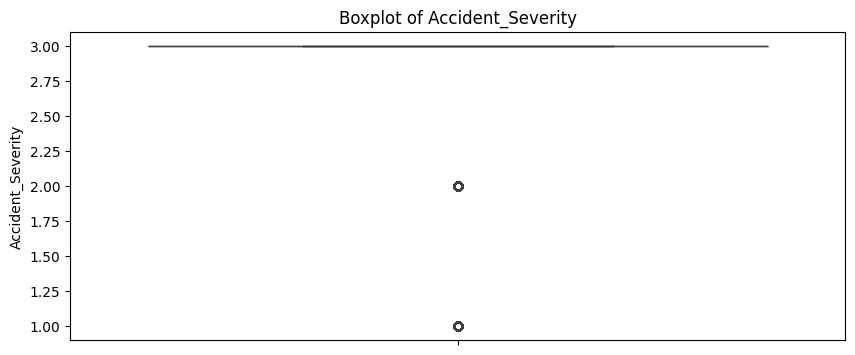

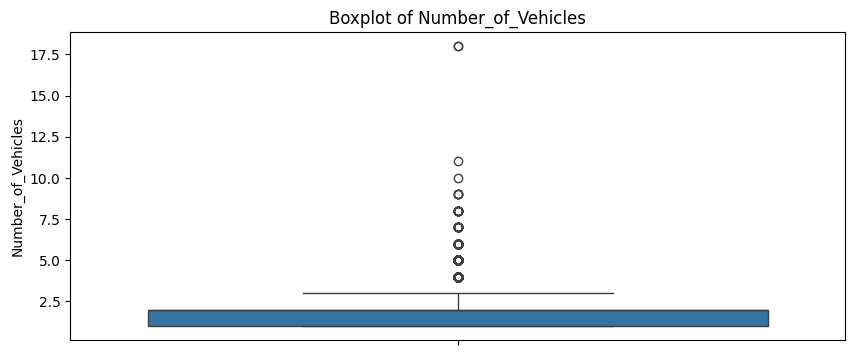

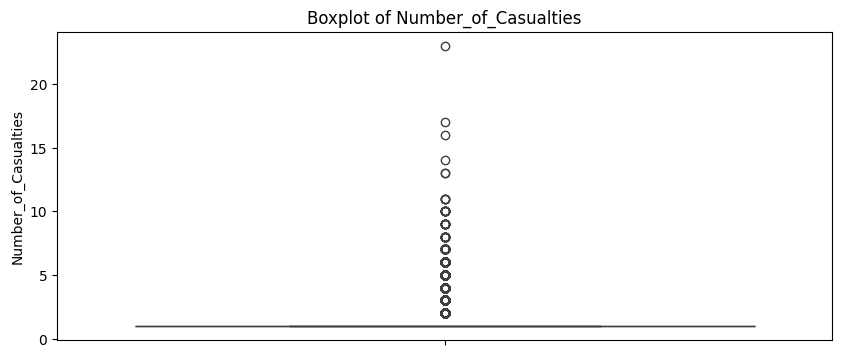

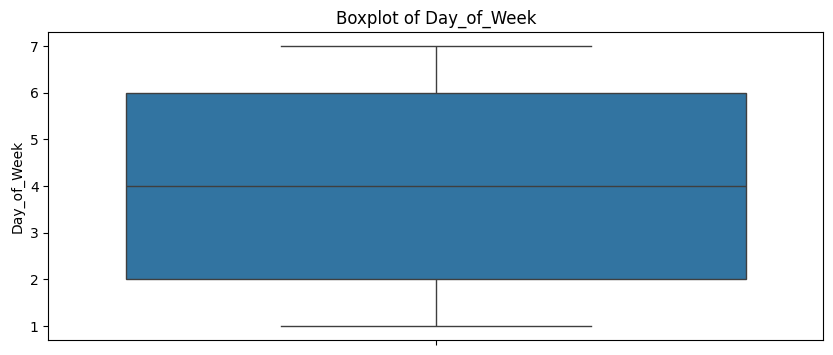

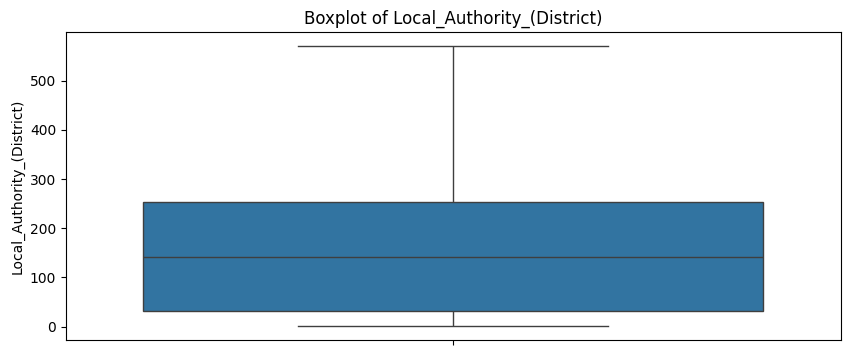

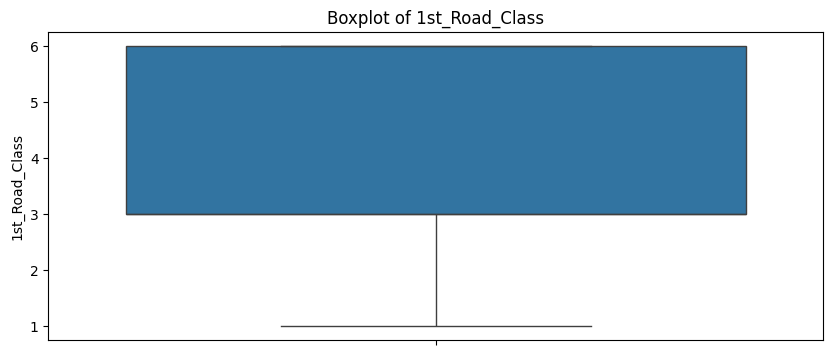

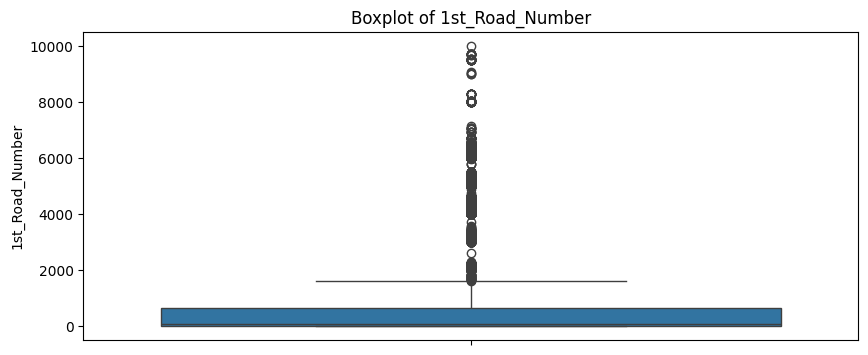

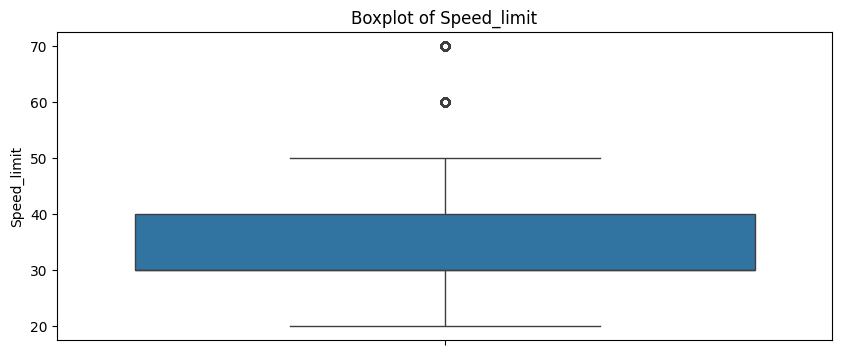

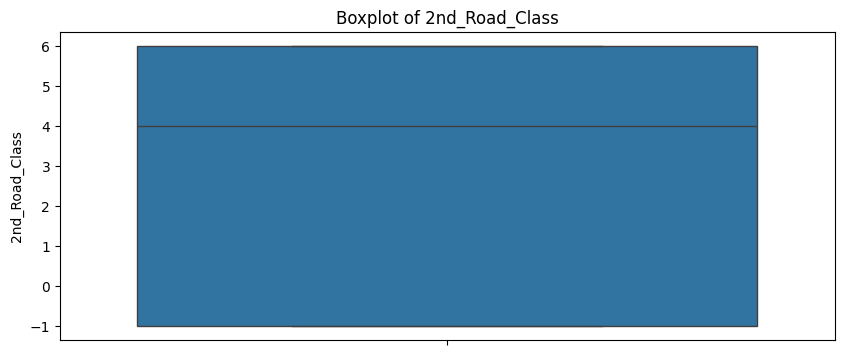

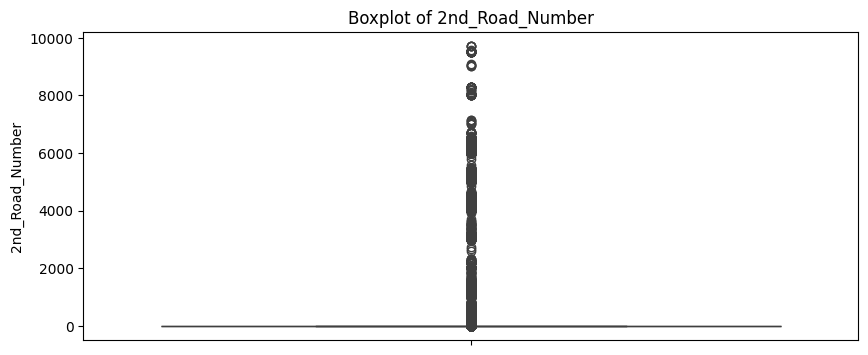

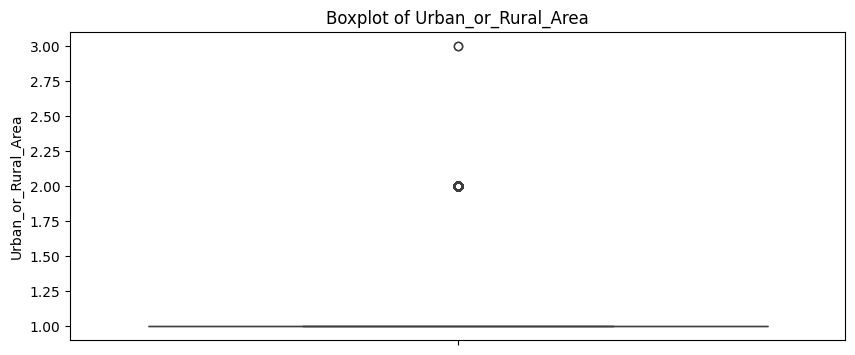

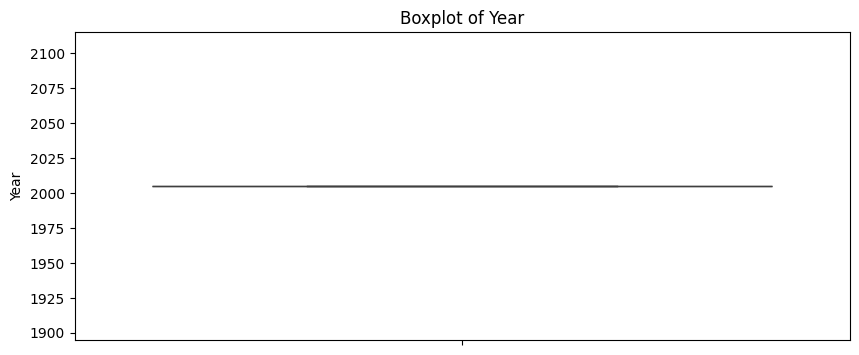

In [ ]:
# Boxplots for detecting outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
corr_matrix = df.corr(numeric_only=True) #

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
from scipy import stats

numerical_cols = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties']

# RMO
df = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)]

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

<ipython-input-183-4527e59b6ea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])


In [ ]:
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

<ipython-input-184-4527e59b6ea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

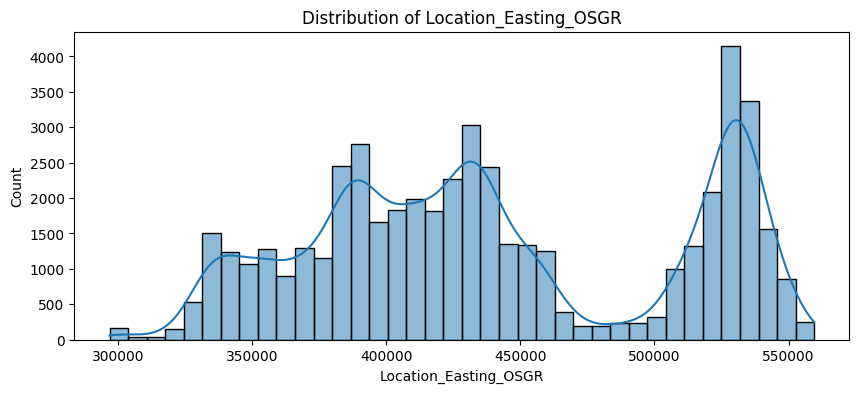

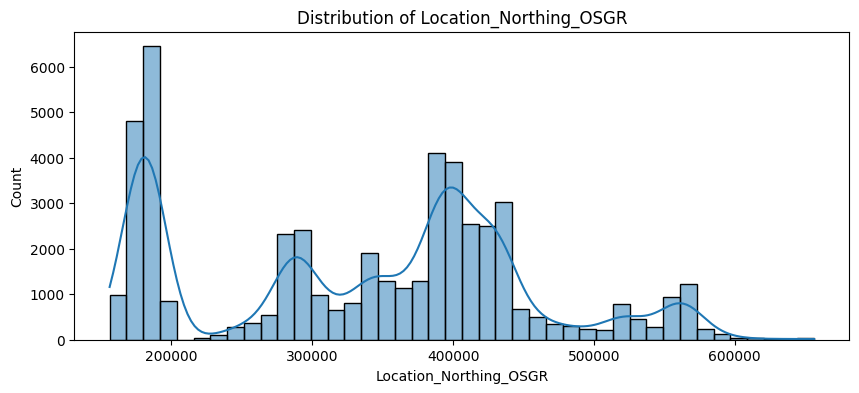

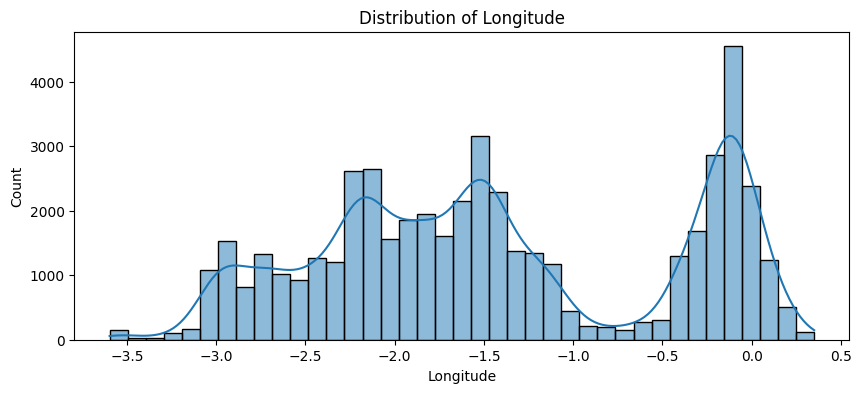

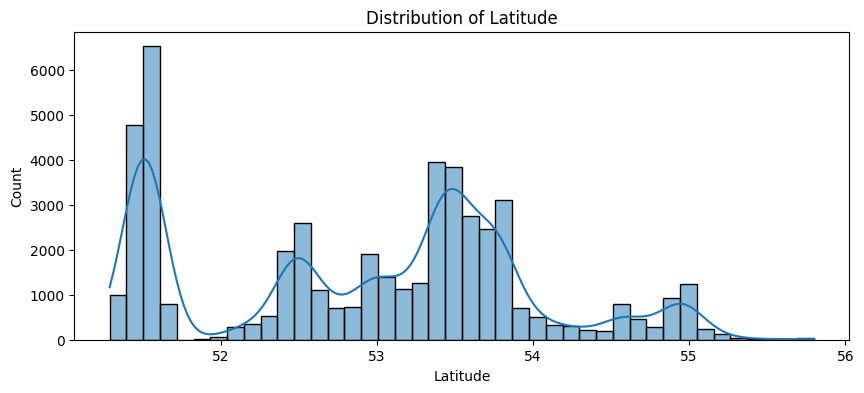

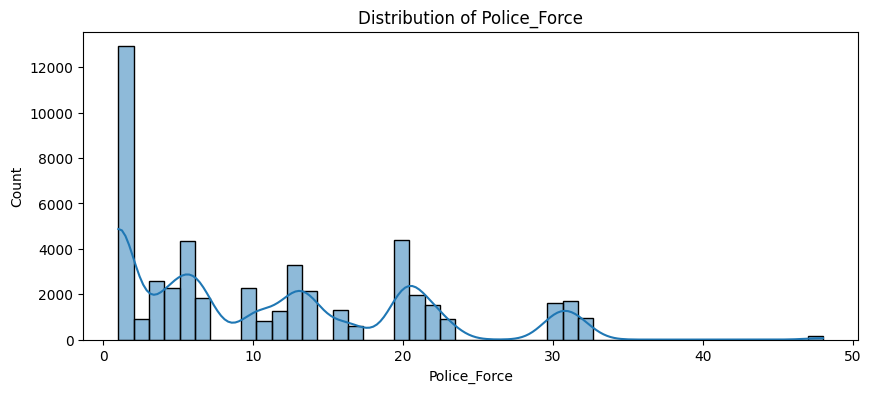

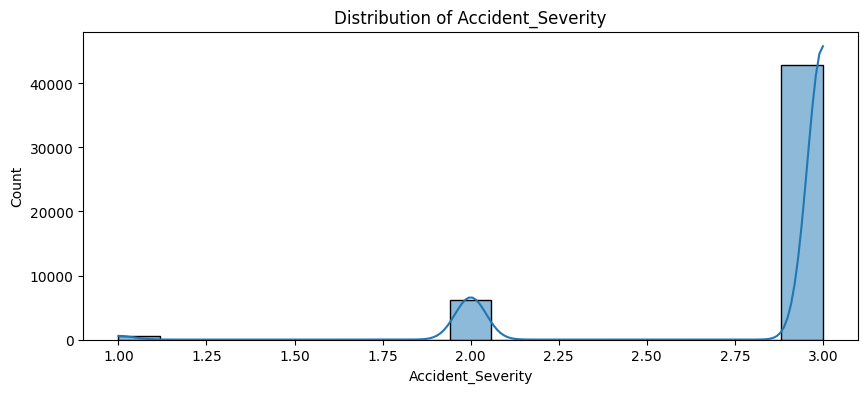

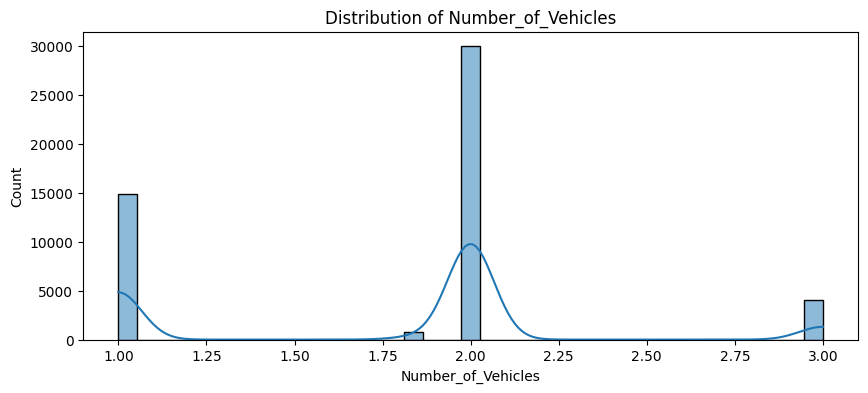

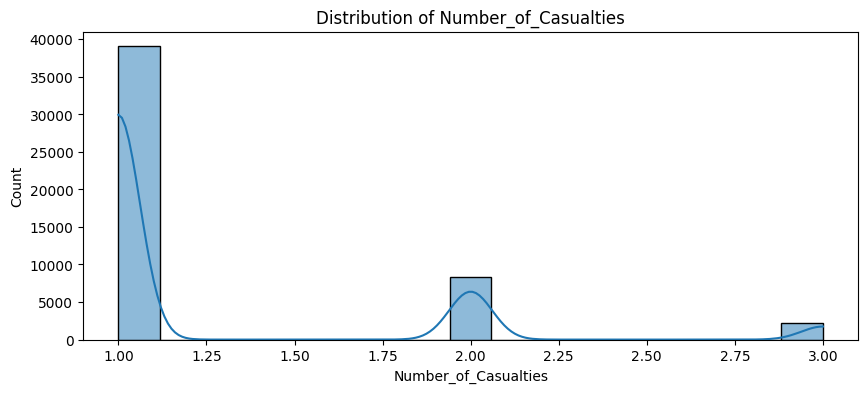

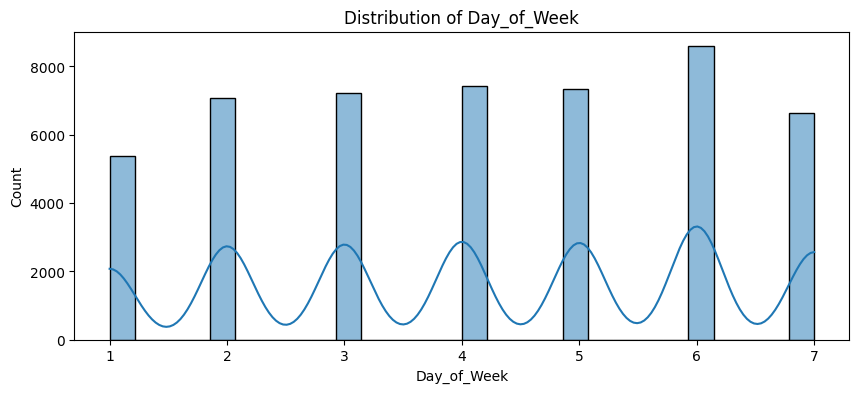

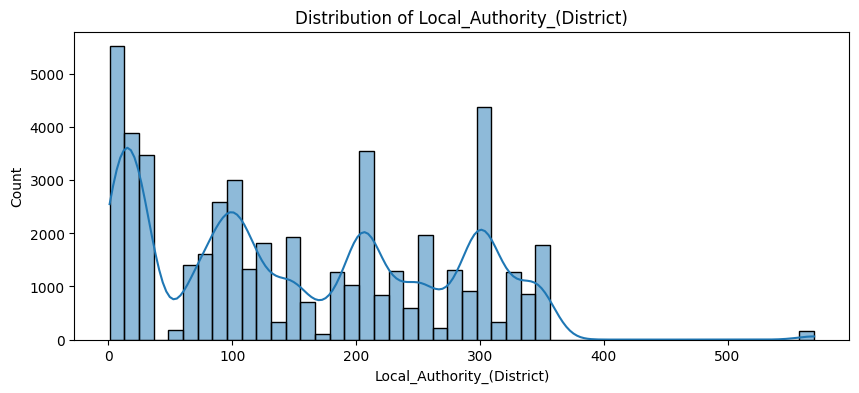

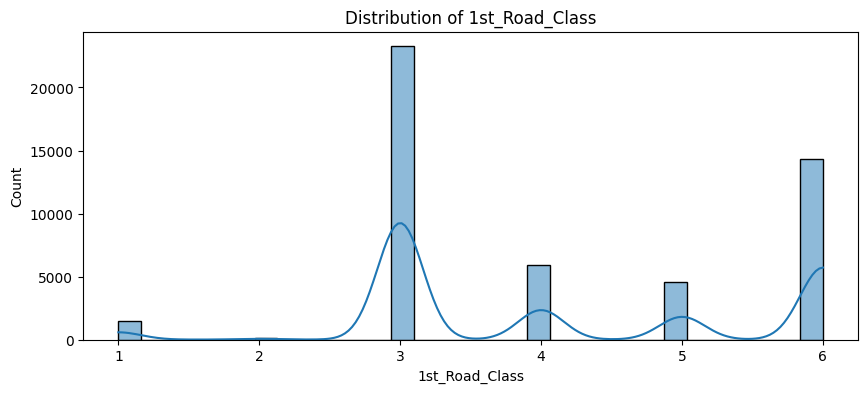

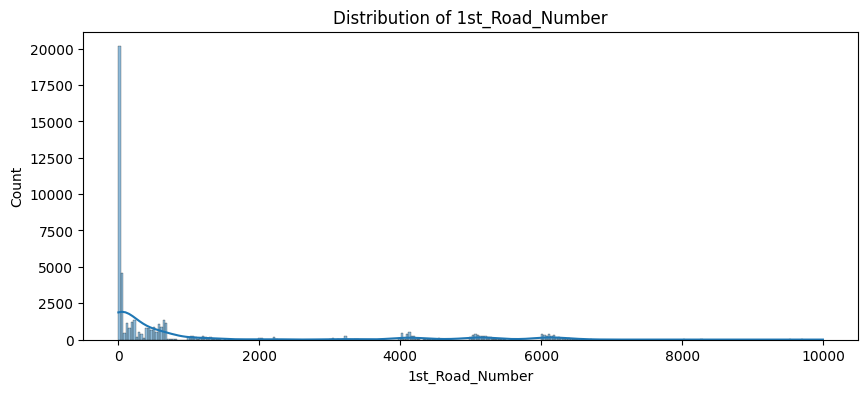

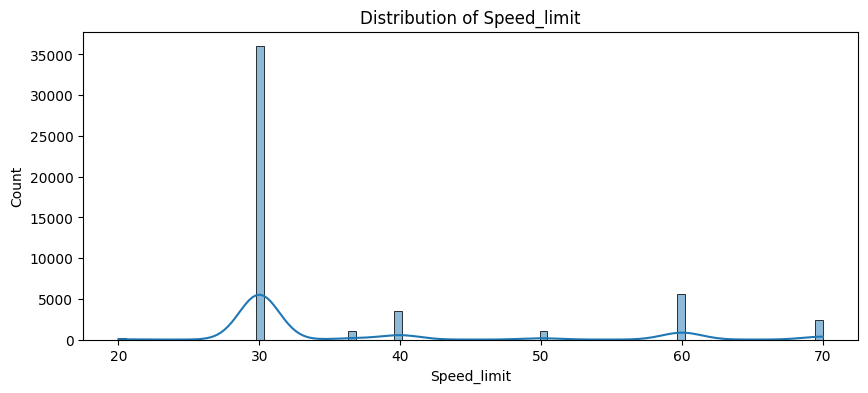

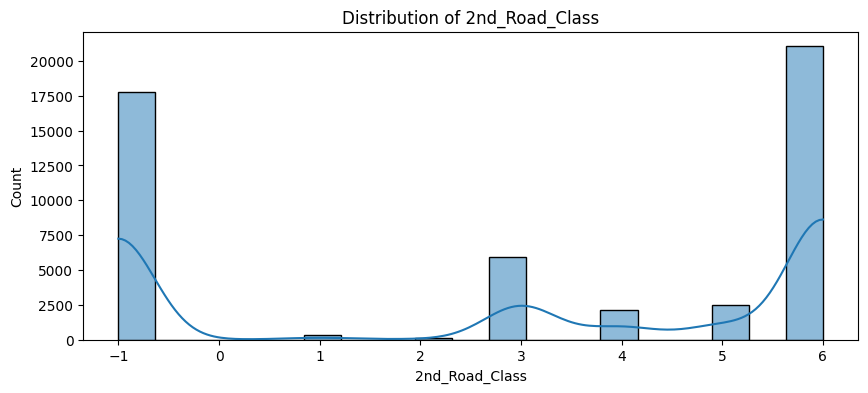

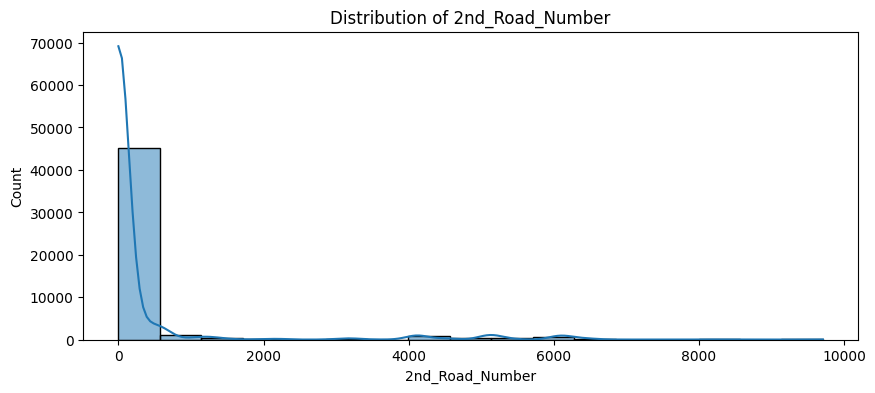

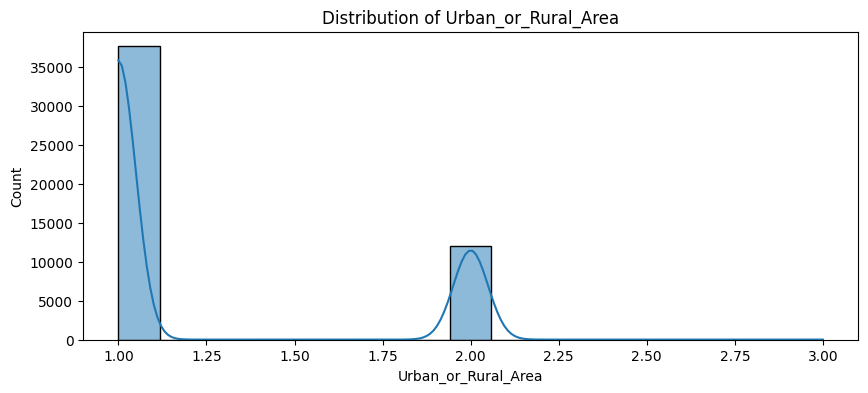

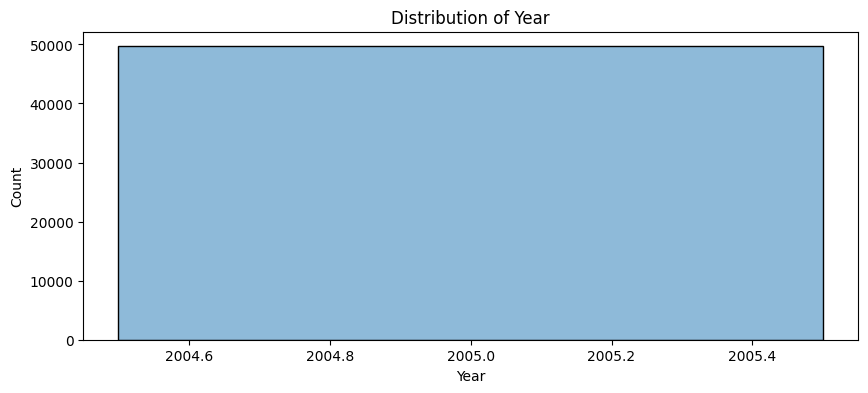

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=[float, int]).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

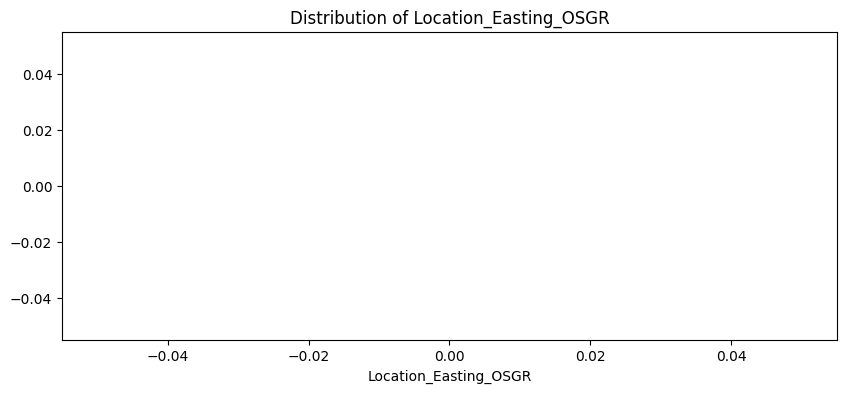

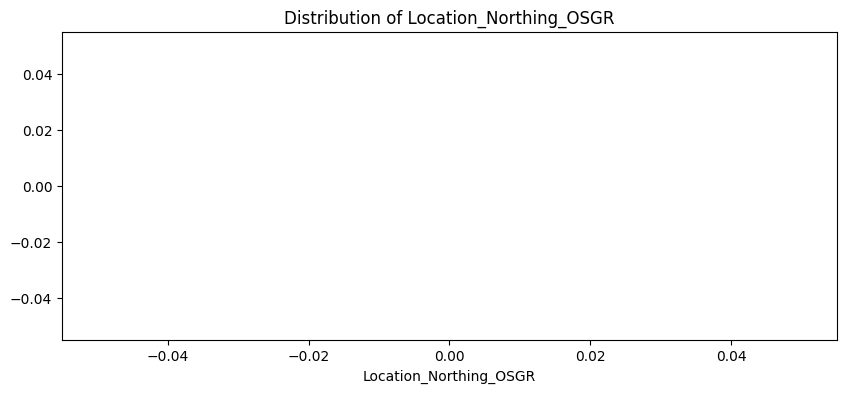

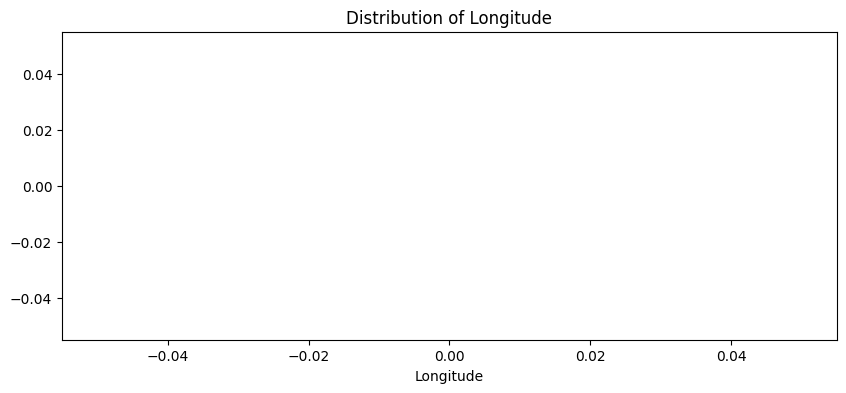

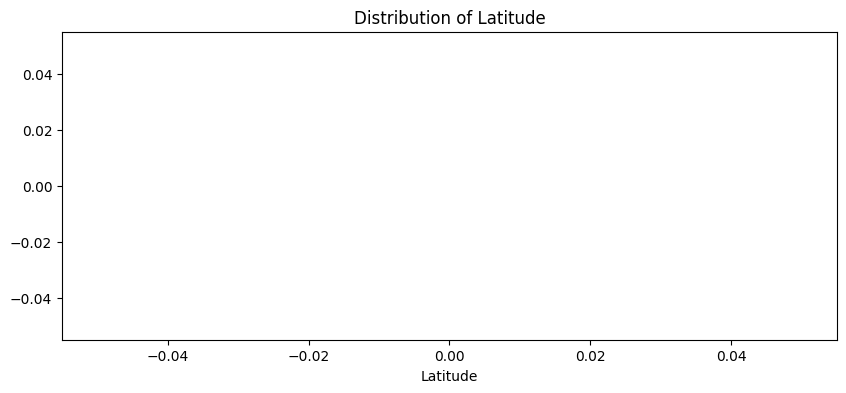

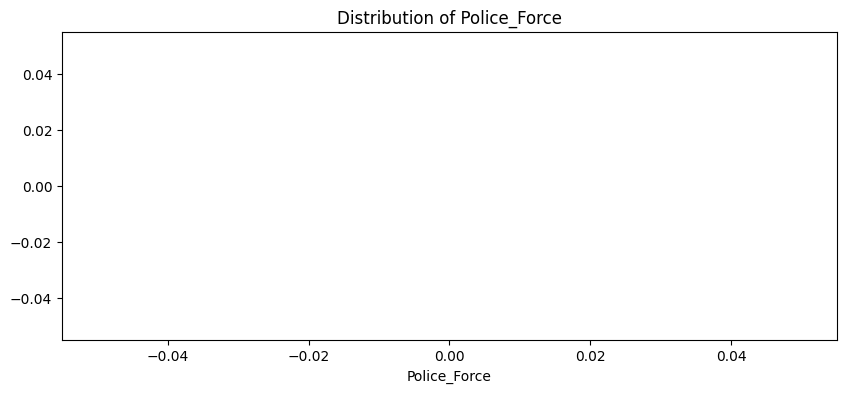

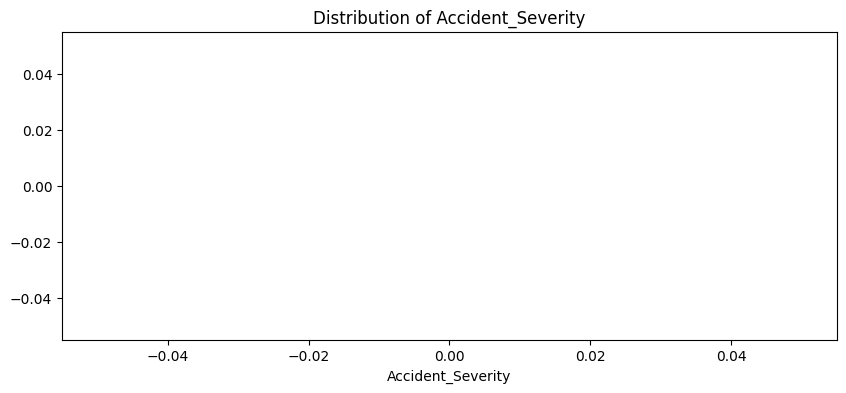

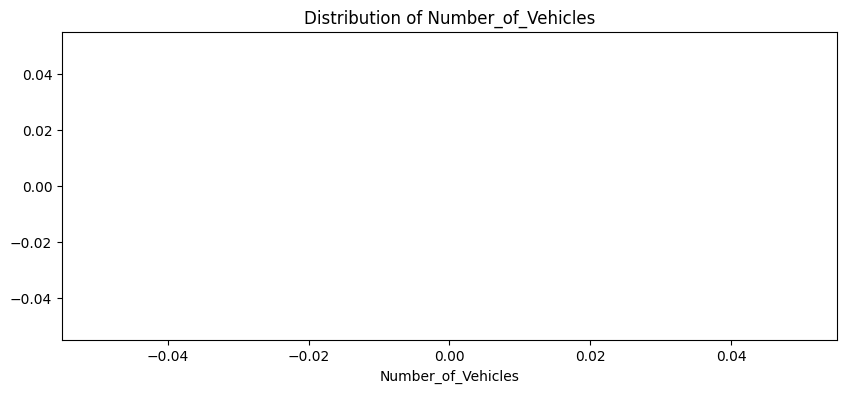

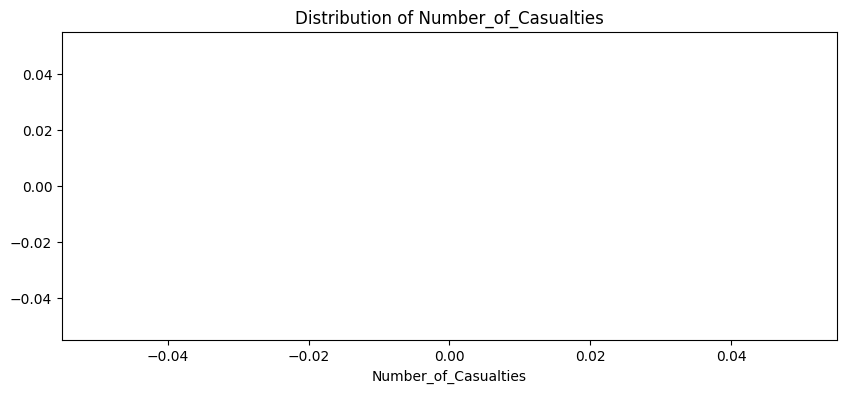

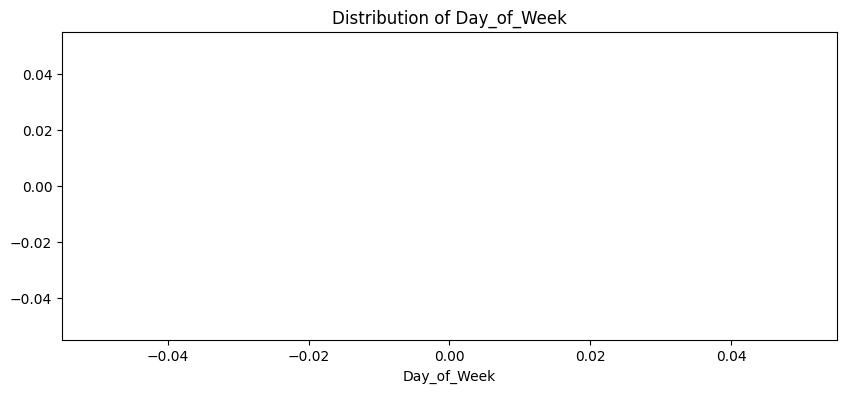

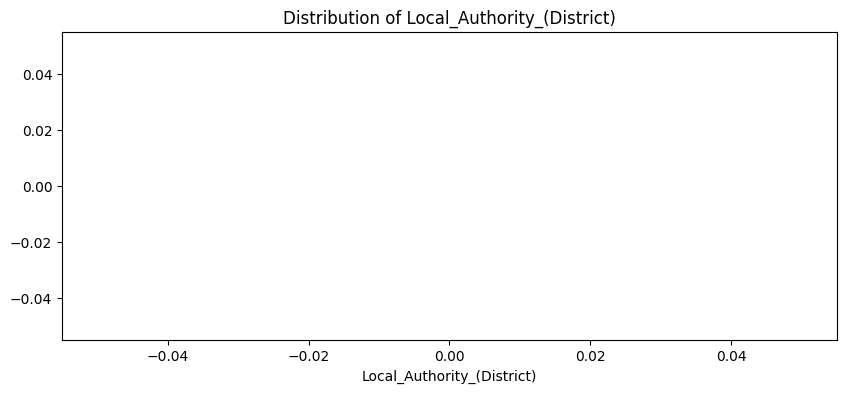

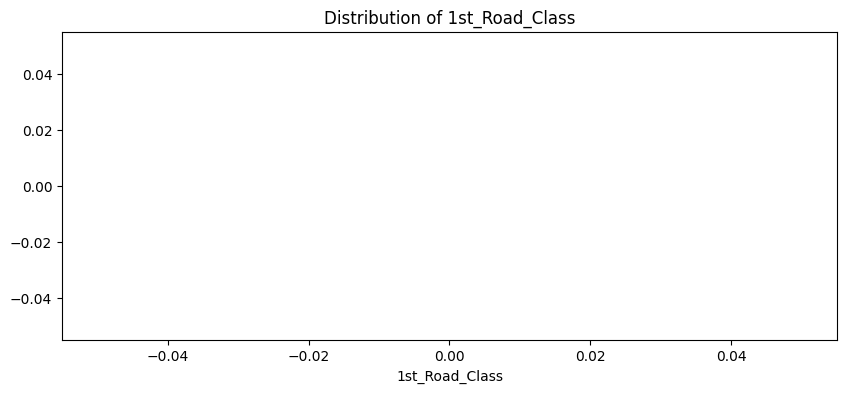

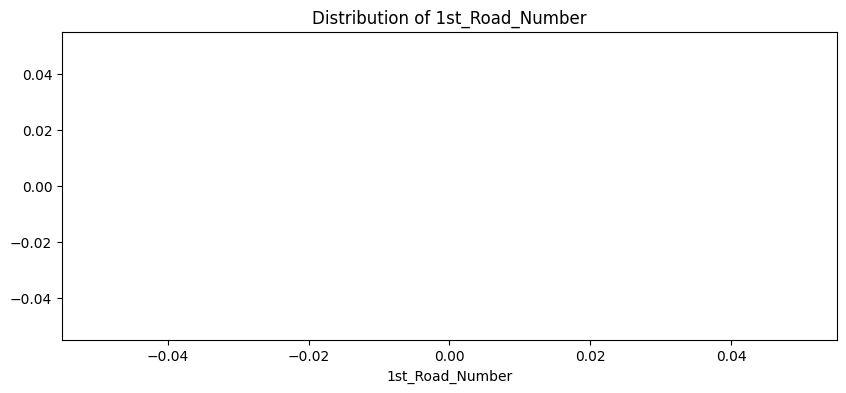

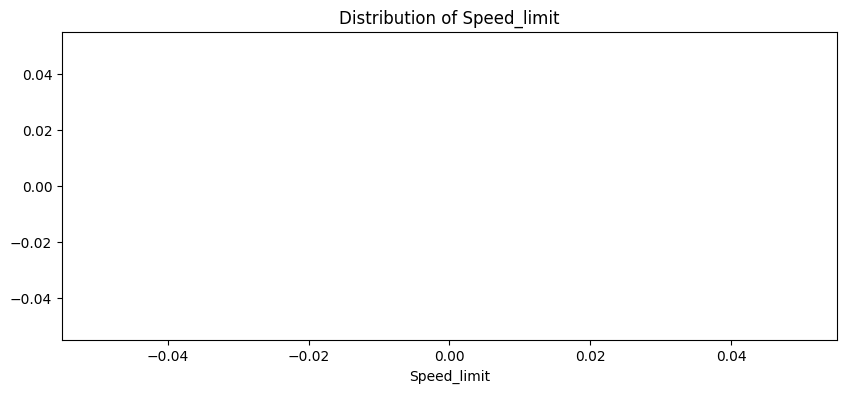

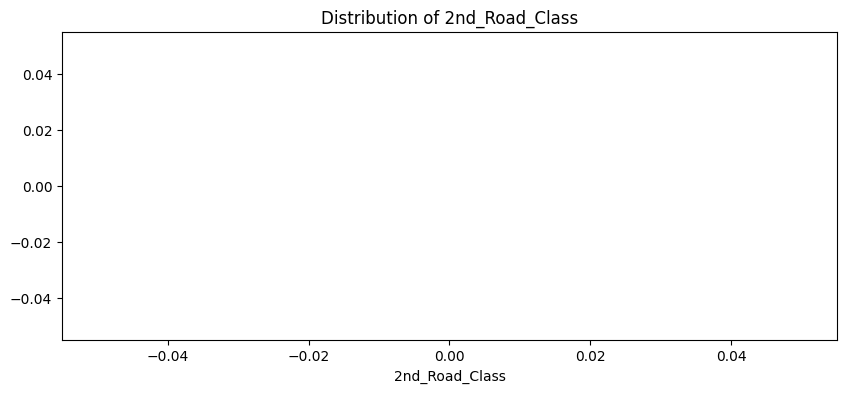

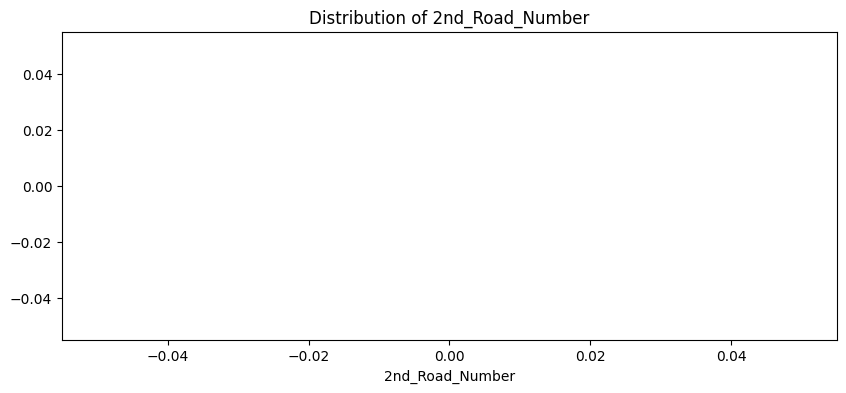

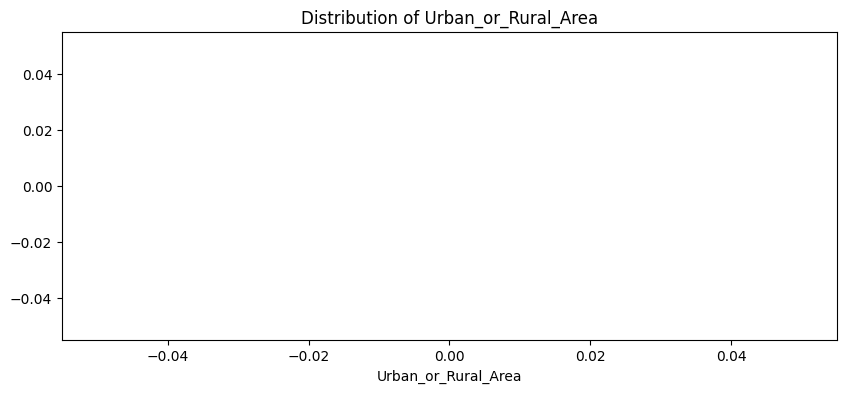

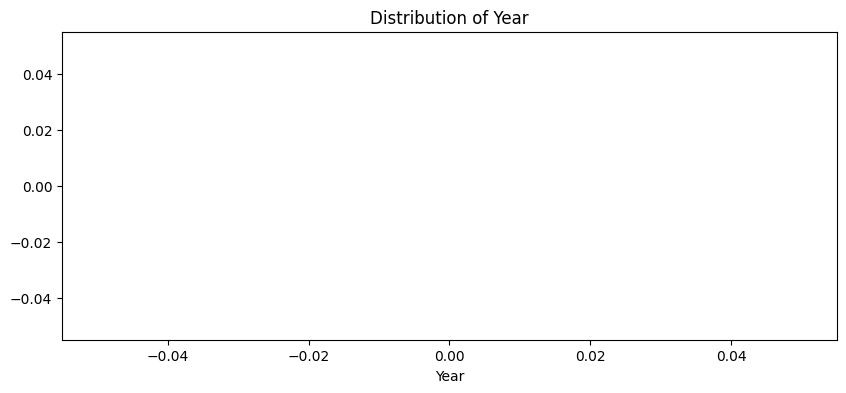

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=[float, int]).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 4))

    sns.scatterplot(x=df[feature].dropna())
    plt.title(f'Distribution of {feature}')
    plt.show()

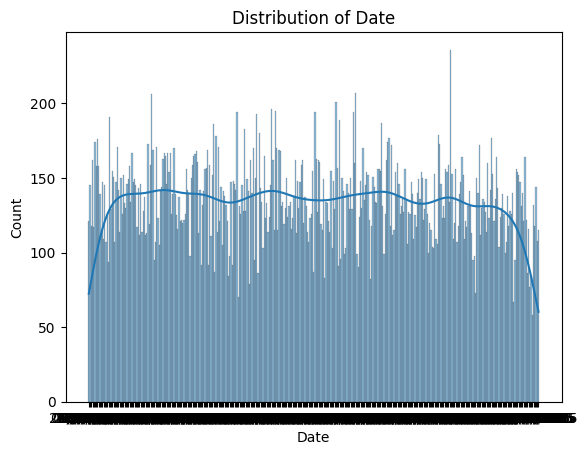

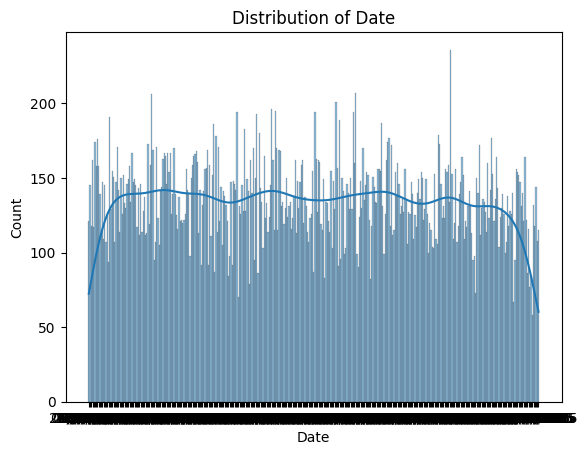

In [ ]:
figure_size=(4,2)
sns.histplot(df['Date'], kde=True)
plt.title('Distribution of Date')
plt.show()
figure_size=(4,2)
sns.histplot(df['Date'], kde=True)
plt.title('Distribution of Date')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

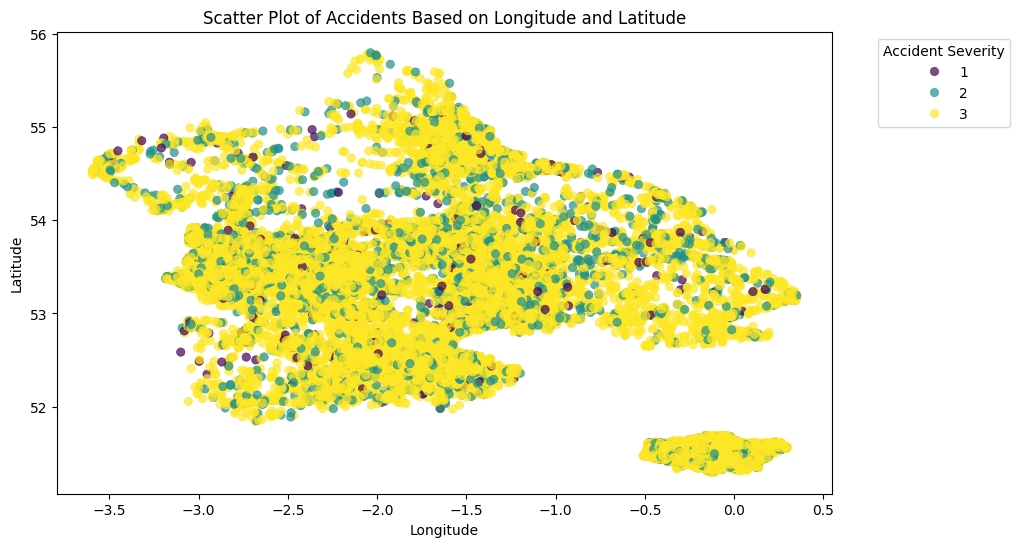

In [ ]:
df = df.dropna(subset=['Longitude', 'Latitude'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Accident_Severity', palette='viridis', alpha=0.7, edgecolor=None)

plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

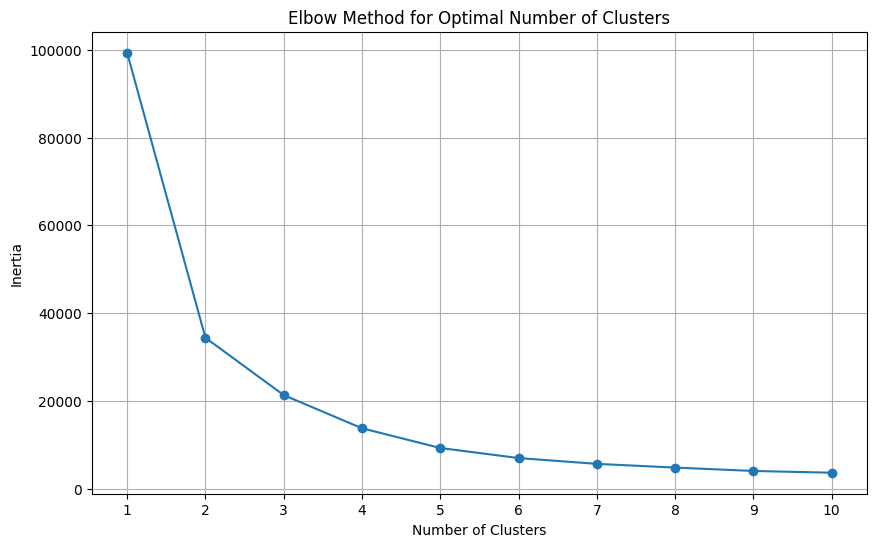

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering = df[['Longitude', 'Latitude']]
df_clustering_scaled = scaler.fit_transform(df_clustering)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(f'Cluster Centers:\n{cluster_centers}')

df_clustering['Cluster'] = kmeans.labels_



Cluster Centers:
[[-1.52806669 54.85278033]
 [-0.12248852 51.50860332]
 [-2.26227831 53.5339316 ]
 [-1.86367462 52.48093764]
 [-1.56811749 53.78068431]
 [-2.84590671 53.50405832]
 [-3.00718933 54.46221593]
 [-0.33112693 53.50164482]
 [-2.3595876  52.81564029]
 [-1.27961534 53.20416555]]


<ipython-input-190-679a559340e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Cluster'] = kmeans.labels_


In [ ]:

df = df.merge(df_clustering['Cluster'], left_index=True, right_index=True, how='inner', suffixes=('_drop', ''))
df = df.drop(columns=[col for col in df.columns if '_drop' in col])
sil_score = silhouette_score(df_clustering_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.59


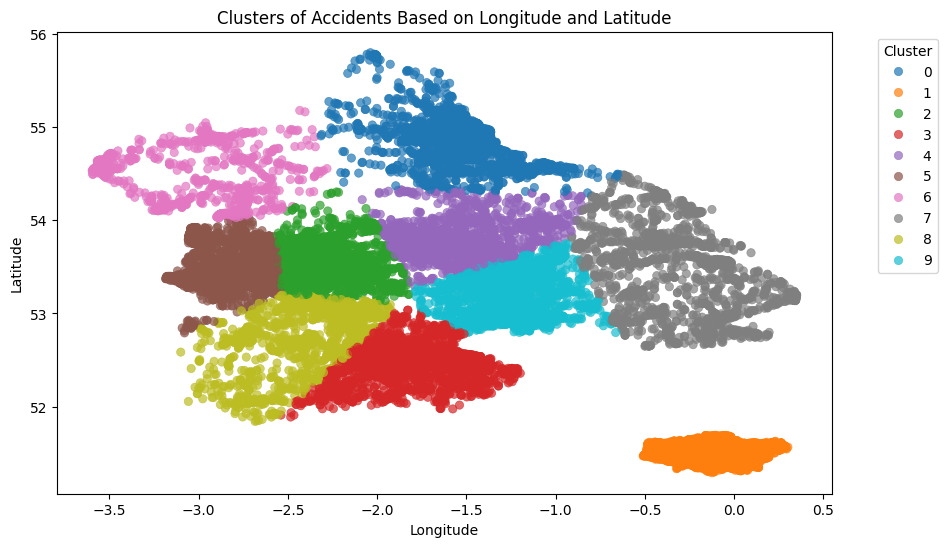

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='tab10', alpha=0.7, edgecolor=None)


plt.title('Clusters of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
wcss = kmeans.inertia_
print(f'Within-Cluster Sum of Squares (WCSS): {wcss:.2f}')


Within-Cluster Sum of Squares (WCSS): 3615.39


## Plot the data points with their predicted cluster center

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


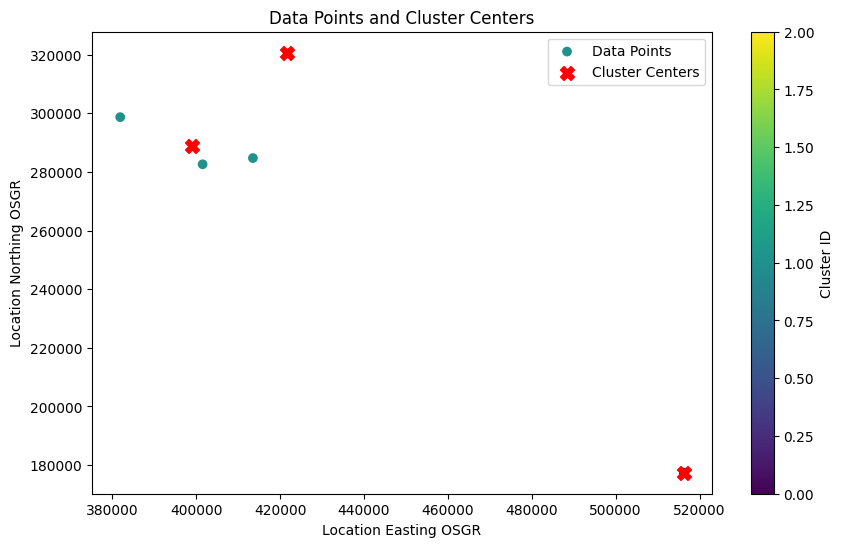

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset (assuming it's already loaded into df)
# df = pd.read_csv('your_data_file.csv')  # Uncomment if reading from a file

# Sample data
df = pd.DataFrame({
    'Location_Easting_OSGR': [381880.0, 413520.0, 516260.0, 401530.0, 421760.0],
    'Location_Northing_OSGR': [298700.0, 284740.0, 177370.0, 282610.0, 320680.0]
})


df_clean = df[['Location_Easting_OSGR', 'Location_Northing_OSGR']].dropna()

X = df_clean[['Location_Easting_OSGR', 'Location_Northing_OSGR']]

kmeans = KMeans(n_clusters=3, random_state=0)
df_clean['Cluster'] = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['Location_Easting_OSGR'], df_clean['Location_Northing_OSGR'], c=df_clean['Cluster'], cmap='viridis', label='Data Points')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Location Easting OSGR')
plt.ylabel('Location Northing OSGR')
plt.title('Data Points and Cluster Centers')
plt.legend()
plt.colorbar(scatter, label='Cluster ID')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1- I chose Longitude and Latitude for clustering. These geographical coordinates are essential because they represent the spatial locations of accidents. By clustering based on these features, we can identify patterns and concentrations of accidents

2-10

3-I used the Elbow Method, which involves plotting the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The optimal number of clusters is indicated by the "elbow" point where the WCSS reduction slows down.



Silhouette Score: Measures how well-separated and cohesive clusters are. A higher score indicates better clustering
Within-Cluster Sum of Squares (WCSS): Assesses cluster compactness. Lower WCSS values suggest tighter

Improvements and Recommendations:

Feature Enhancement: Include features like Weather_Conditions, Road_Type, and Time for better clustering results.

Advanced Clustering Algorithms:
DBSCAN: For clusters of varying shapes and densities.

Hierarchical Clustering: For a hierarchical view of clusters.

Gaussian Mixture Models (GMMs): For flexibility in cluster shapes.

Dimensionality Reduction: Use PCA to reduce feature dimensions and improve clustering performance.

Spatial Analysis: Apply spatial clustering techniques to understand accident distribution better.